In [32]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import seaborn as sns
from scipy import stats
import math

base_path = 'data/test/'

## test 1 - 50 samples

In [40]:
tb50 = pd.read_csv(f'{base_path}/data_1245.csv')
tb100 = pd.read_csv(f'{base_path}/data_1294.csv')
tb2000 = pd.read_csv(f'{base_path}/data_1397.csv')

In [ ]:
def provideStats(test_results):
    A,B,C,D = test_results['A'], test_results['B'], test_results['C'], test_results['D']
    observations = [A,B,C,D]

    d = {'mean': [np.mean(t) for t in observations], 
         'variance': [np.var(t) for t in observations], 
         '95_conf': [np.round(st.t.interval(0.95, len(t)-1, loc=np.mean(t), scale=st.sem(t)), decimals=3) for t in observations]}
    
    stats = pd.DataFrame(data=d, index=['A','B','C','D'])

    return stats

def plotData(df, *, close_existing=True):

    if close_existing:
        plt.close('all')           # prevents accidental “ghost” figures

    # keep only numeric columns (strings, categoricals, objects are ignored)
    cols = [c for c in df.columns if is_numeric_dtype(df[c])][1:]
    if not cols:
        raise ValueError("No numeric columns to plot.")

         # one figure, one set of axes
    plt.figure(figsize=(10,6))
    for col in cols:
        plt.plot(df.index, df[col], label=col,)

    plt.xlabel("Index")
    plt.ylabel("Value")
    plt.legend()
    plt.tight_layout()
    plt.show()

def plotCorrelation(df, *, close_existing=True):
    if close_existing:
        plt.close('all')

    # isolate numeric columns
    num_cols = [c for c in df.columns if is_numeric_dtype(df[c])][1:]
    if len(num_cols) < 2:
        raise ValueError("Need at least two numeric columns to compute correlations.")

    # --- 1. Correlation heat-map -------------------------------------------
    corr = df[num_cols].corr()
    fig_hm, ax_hm = plt.subplots(figsize=(8, 6))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", ax=ax_hm)
    ax_hm.set_title("Correlation matrix")
    fig_hm.tight_layout()

    # --- 2. Pair-plot with regression lines ---------------------------------
    sns.pairplot(df[num_cols], kind="reg", diag_kind="kde", corner=True)

    # --- 3. QQ plots for each column vs. Normal -----------------------------
    n = len(num_cols)
    n_cols = math.ceil(math.sqrt(n))
    n_rows = math.ceil(n / n_cols)
    fig_qq, axes = plt.subplots(n_rows, n_cols,
                                figsize=(4 * n_cols, 4 * n_rows),
                                squeeze=False)

    for i, col in enumerate(num_cols):
        r, c = divmod(i, n_cols)
        stats.probplot(df[col].dropna(), dist="norm", plot=axes[r][c])
        axes[r][c].set_title(f"QQ plot: {col}")

    # remove any leftover empty axes
    for j in range(i + 1, n_rows * n_cols):
        r, c = divmod(j, n_cols)
        fig_qq.delaxes(axes[r][c])

    fig_qq.suptitle("QQ plots vs. Normal distribution", y=1.02)
    fig_qq.tight_layout()

    # --- Show everything ----------------------------------------------------
    plt.show()

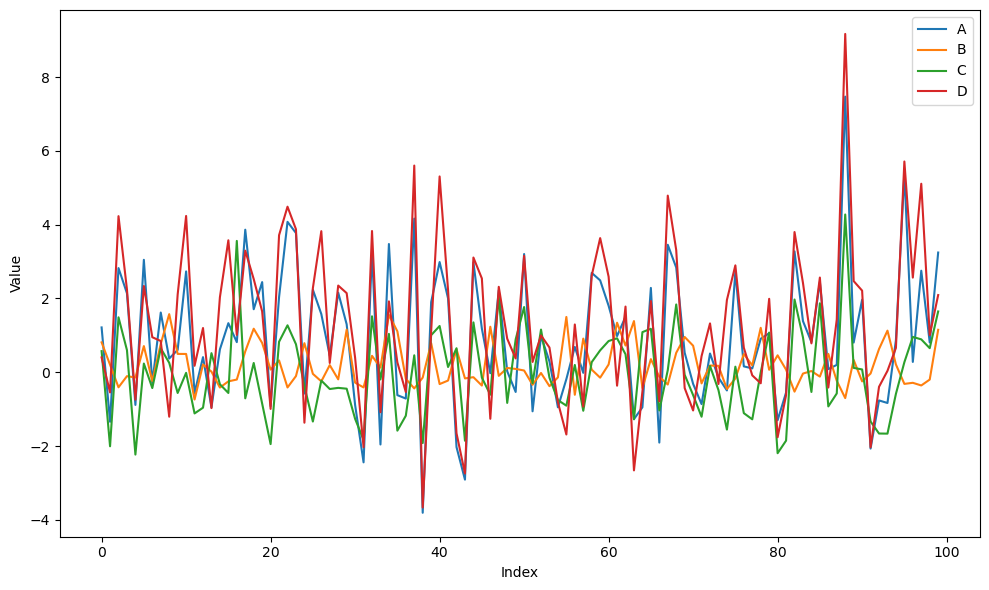

In [31]:
plotData(test_base)

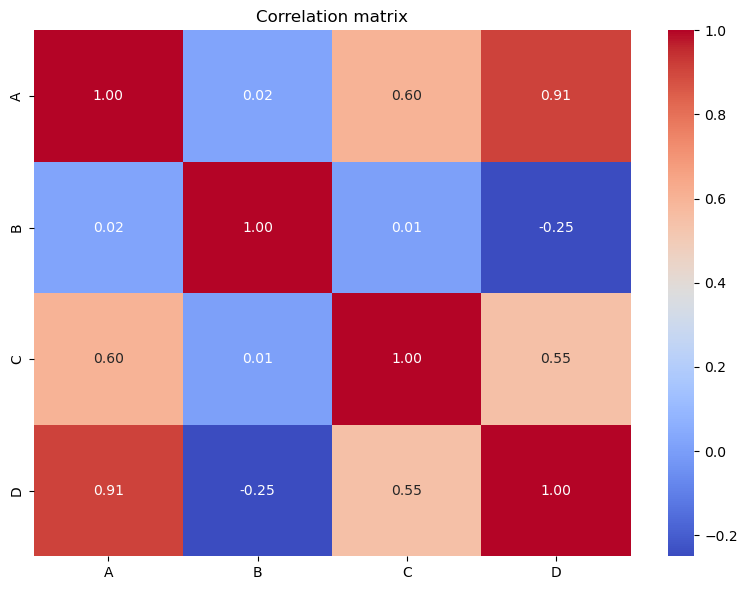

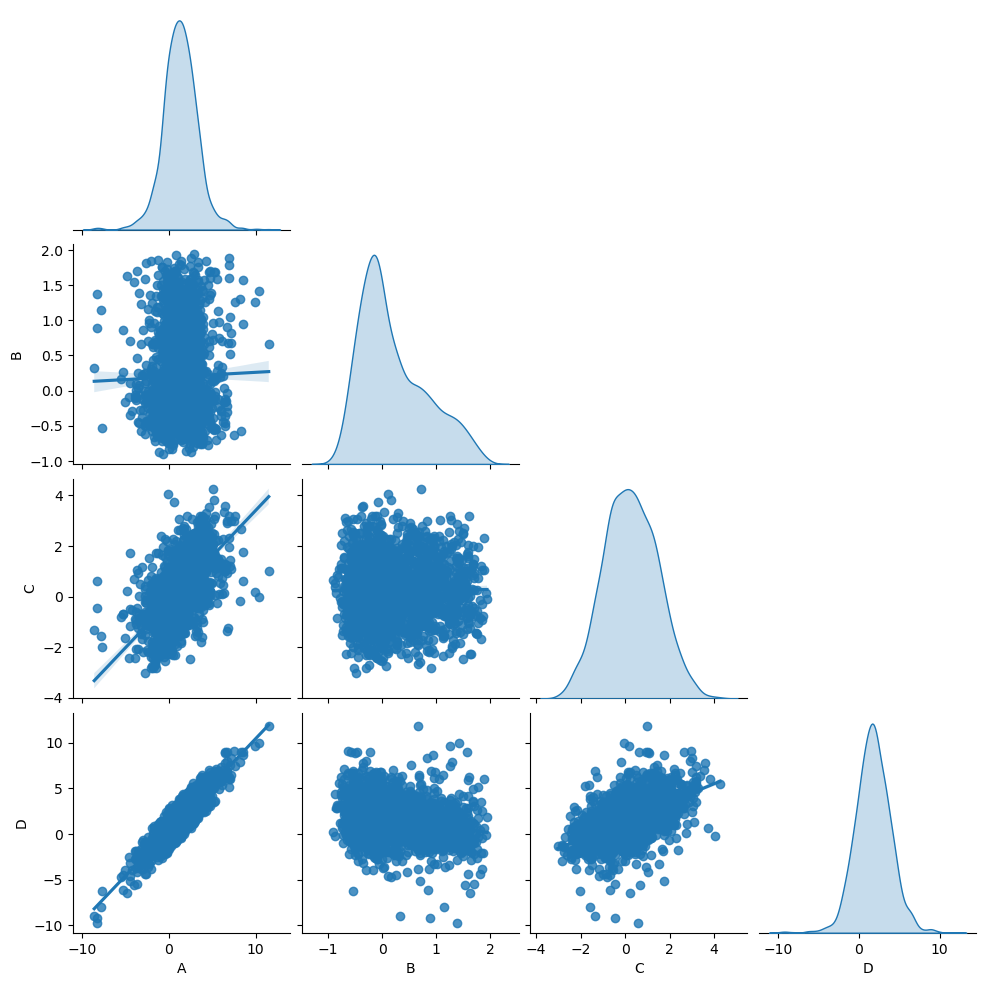

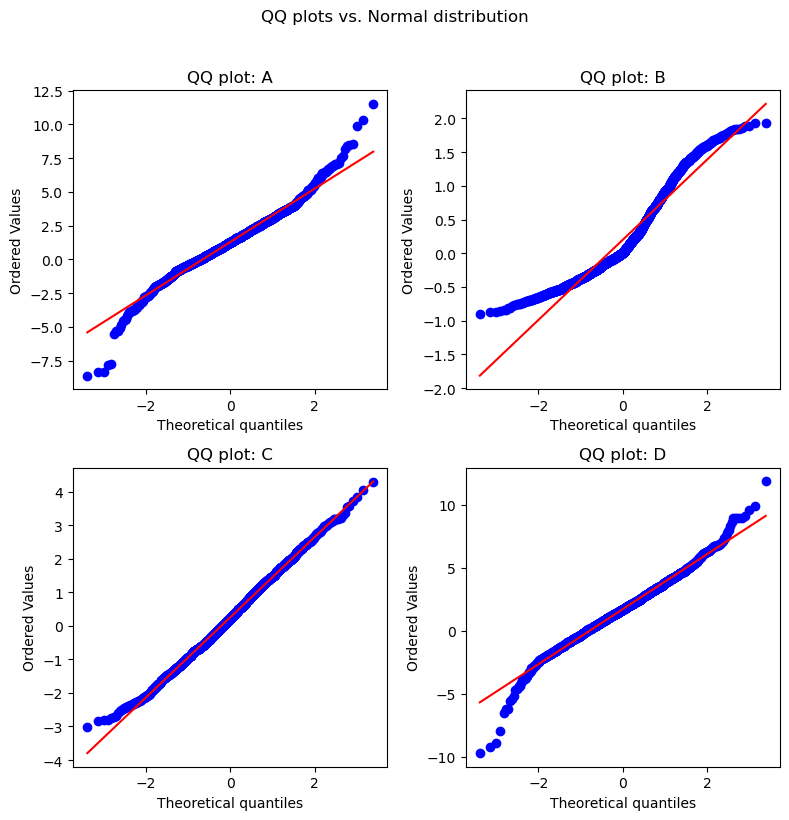

In [39]:
plotCorrelation(tb2000)

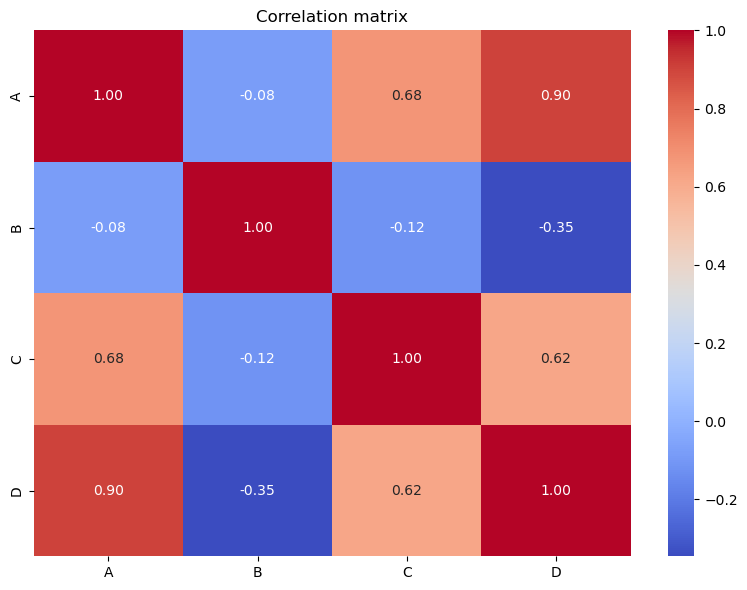

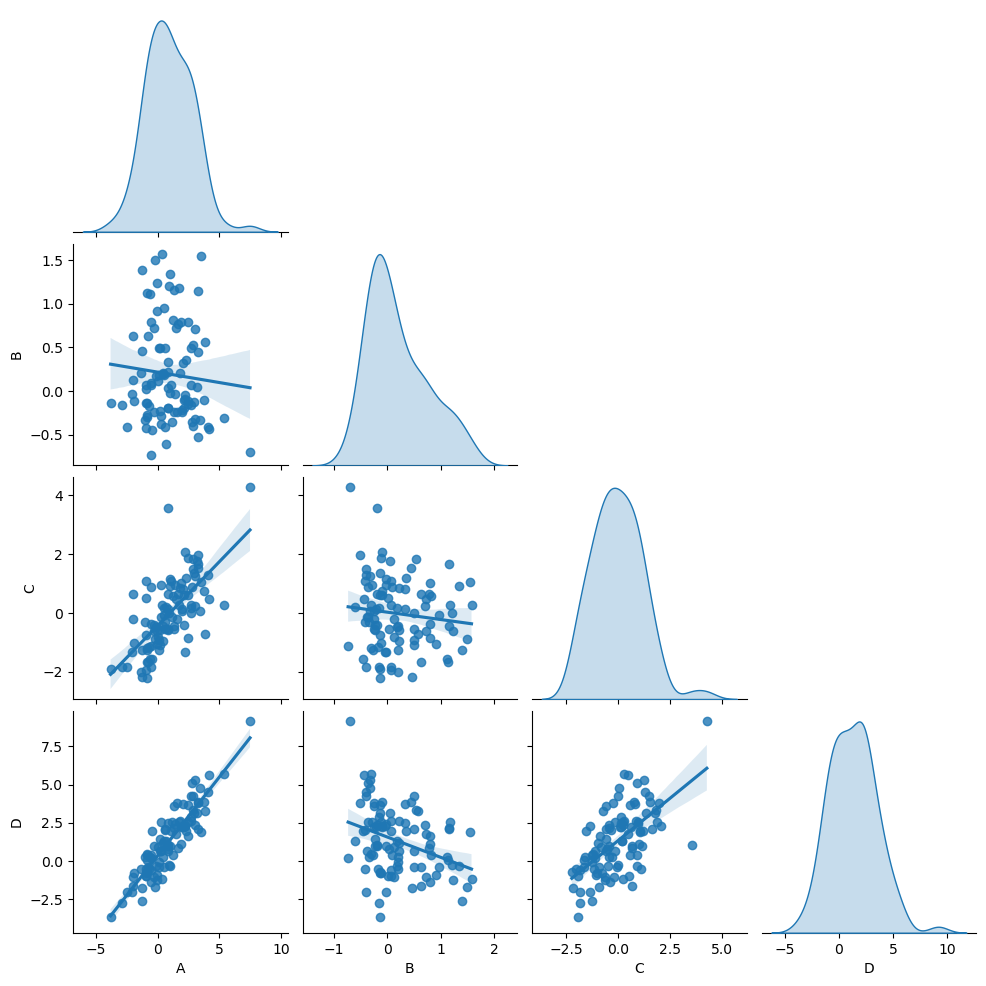

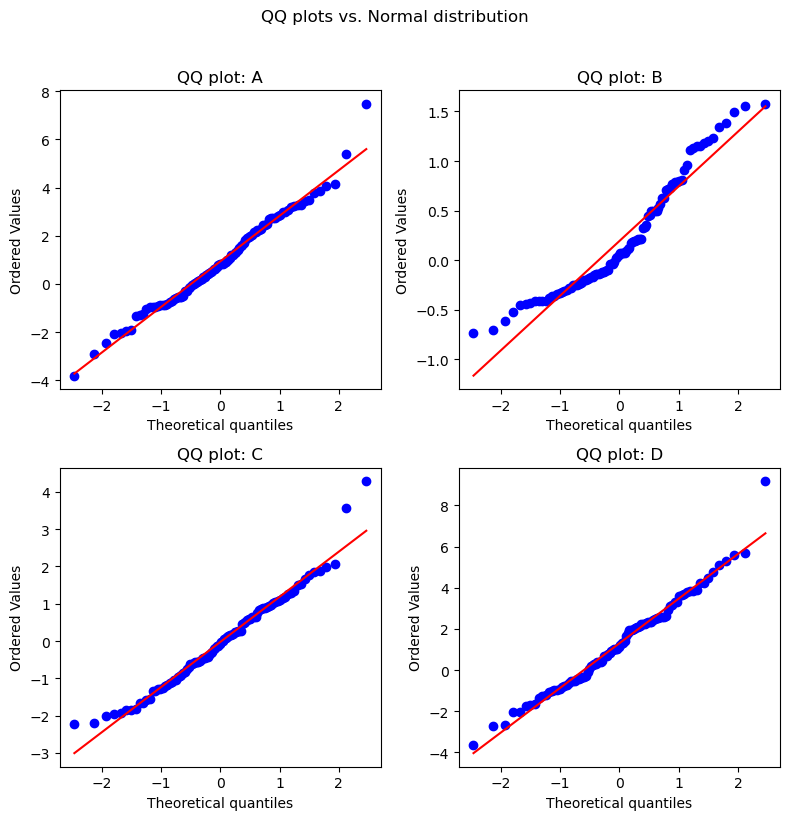

In [41]:
plotCorrelation(tb100)

In [6]:
test_base.sample(20,random_state=33)

,Unnamed: 0,A,B,C,D
56,56,0.687665,-0.608499,0.200065,1.296164
90,90,1.967493,-0.245477,0.077472,2.212970
95,95,5.397759,-0.313667,0.274246,5.711427
82,82,3.277018,-0.523445,1.972155,3.800463
60,60,1.802618,0.211978,0.847298,2.590640
71,71,-0.860821,-0.299826,-1.203109,0.439006
6,6,-0.290765,-0.241295,-0.426560,0.950531
81,81,-0.547913,0.072661,-1.850769,-0.620574
2,2,2.824409,-0.406210,1.489721,4.230619
70,70,-0.312933,0.720751,-0.617722,-1.033684


A: + 
B: - +
C: - -
D: - -

In [66]:
provideStats(testA2)

c:\Users\lucas\miniconda3\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2246: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
c:\Users\lucas\miniconda3\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2247: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


,mean,variance,95_conf
A,2.000000,0.000000,"[nan, nan]"
B,0.269582,0.367735,"[0.149, 0.391]"
C,0.348570,1.529627,"[0.102, 0.595]"
D,2.340418,0.859725,"[2.156, 2.525]"


## test 2 - 100 samples: a,b,c=0

In [40]:
testD = pd.read_csv(f'{base_path}/data_1252.csv')

In [41]:
provideStats(testD)

c:\Users\lucas\miniconda3\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2246: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
c:\Users\lucas\miniconda3\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2247: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


,mean,variance,95_conf
A,0.00,0.0000,"[nan, nan]"
B,0.00,0.0000,"[nan, nan]"
C,0.00,0.0000,"[nan, nan]"
D,0.83,0.6011,"[0.675, 0.985]"


## test 3 - 100 samples: b,c,d=0

In [43]:
testA = pd.read_csv(f'{base_path}/data_1259.csv')

In [52]:
provideStats(testA)

c:\Users\lucas\miniconda3\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2246: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
c:\Users\lucas\miniconda3\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2247: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


,mean,variance,95_conf
A,1.049049,1.687955,"[0.79, 1.308]"
B,0.000000,0.000000,"[nan, nan]"
C,0.000000,0.000000,"[nan, nan]"
D,0.000000,0.000000,"[nan, nan]"


In [46]:
testB = pd.read_csv(f'{base_path}/data_1288.csv')
testC = pd.read_csv(f'{base_path}/data_1287.csv')

provideStats(testB)

c:\Users\lucas\miniconda3\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2246: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
c:\Users\lucas\miniconda3\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2247: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


,mean,variance,95_conf
A,0.000000,0.000000,"[nan, nan]"
B,0.373598,0.462405,"[0.238, 0.509]"
C,0.000000,0.000000,"[nan, nan]"
D,0.000000,0.000000,"[nan, nan]"


In [47]:
provideStats(testC)

c:\Users\lucas\miniconda3\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2246: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
c:\Users\lucas\miniconda3\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2247: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


,mean,variance,95_conf
A,0.000000,0.000000,"[nan, nan]"
B,0.000000,0.000000,"[nan, nan]"
C,0.260062,1.513223,"[0.015, 0.505]"
D,0.000000,0.000000,"[nan, nan]"


In [56]:
testA0 = pd.read_csv(f'{base_path}/data_1298.csv')
testA2 = pd.read_csv(f'{base_path}/data_1300.csv')
provideStats(testA0)

c:\Users\lucas\miniconda3\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2246: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
c:\Users\lucas\miniconda3\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2247: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


,mean,variance,95_conf
A,0.000000,0.000000,"[nan, nan]"
B,0.157915,0.379460,"[0.035, 0.281]"
C,0.461821,1.169489,"[0.246, 0.677]"
D,0.422085,0.745123,"[0.25, 0.594]"


In [57]:
provideStats(testA2)

c:\Users\lucas\miniconda3\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2246: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
c:\Users\lucas\miniconda3\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2247: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


,mean,variance,95_conf
A,2.000000,0.000000,"[nan, nan]"
B,0.269582,0.367735,"[0.149, 0.391]"
C,0.348570,1.529627,"[0.102, 0.595]"
D,2.340418,0.859725,"[2.156, 2.525]"


In [58]:
testB0 = pd.read_csv(f'{base_path}/data_1301.csv')
testB2 = pd.read_csv(f'{base_path}/data_1302.csv')

provideStats(testB0)

c:\Users\lucas\miniconda3\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2246: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
c:\Users\lucas\miniconda3\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2247: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


,mean,variance,95_conf
A,1.273036,3.312203,"[0.91, 1.636]"
B,0.000000,0.000000,"[nan, nan]"
C,0.465431,1.582234,"[0.215, 0.716]"
D,1.903036,3.561186,"[1.527, 2.279]"


In [59]:
provideStats(testB2)

c:\Users\lucas\miniconda3\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2246: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
c:\Users\lucas\miniconda3\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2247: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


,mean,variance,95_conf
A,1.354635,2.813568,"[1.02, 1.689]"
B,2.000000,0.000000,"[nan, nan]"
C,0.297857,1.361462,"[0.065, 0.531]"
D,0.124635,2.902009,"[-0.215, 0.464]"


In [60]:
testC0 = pd.read_csv(f'{base_path}/data_1303.csv')
testC2 = pd.read_csv(f'{base_path}/data_1304.csv')

In [61]:
provideStats(testC0)

c:\Users\lucas\miniconda3\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2246: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
c:\Users\lucas\miniconda3\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2247: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


,mean,variance,95_conf
A,0.935981,2.250292,"[0.637, 1.235]"
B,0.229555,0.370218,"[0.108, 0.351]"
C,0.000000,0.000000,"[nan, nan]"
D,1.496426,2.606625,"[1.174, 1.818]"


In [62]:
provideStats(testC2)

c:\Users\lucas\miniconda3\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2246: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
c:\Users\lucas\miniconda3\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2247: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


,mean,variance,95_conf
A,3.076311,1.783391,"[2.81, 3.343]"
B,0.344454,0.404447,"[0.218, 0.471]"
C,2.000000,0.000000,"[nan, nan]"
D,3.381856,2.507246,"[3.066, 3.698]"


In [63]:
testD0 = pd.read_csv(f'{base_path}/data_1307.csv')
testD2 = pd.read_csv(f'{base_path}/data_1308.csv')

In [64]:
provideStats(testD0)

c:\Users\lucas\miniconda3\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2246: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
c:\Users\lucas\miniconda3\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2247: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


,mean,variance,95_conf
A,0.965493,3.806734,"[0.576, 1.355]"
B,0.237889,0.377358,"[0.115, 0.36]"
C,-0.000337,1.323539,"[-0.23, 0.229]"
D,0.000000,0.000000,"[nan, nan]"


In [65]:
provideStats(testD2)

c:\Users\lucas\miniconda3\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2246: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
c:\Users\lucas\miniconda3\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2247: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


,mean,variance,95_conf
A,1.358024,3.628642,"[0.978, 1.738]"
B,0.204358,0.406809,"[0.077, 0.332]"
C,0.407688,1.199395,"[0.189, 0.626]"
D,2.000000,0.000000,"[nan, nan]"
